3 [опция]. Реализуйте дерево для задачи регрессии. Возьмите за основу дерево, реализованное в методичке, заменив механизм предсказания в листе на взятие среднего значения по выборке, и критерий Джини на дисперсию значений.

In [1]:
import matplotlib.pyplot as plt
import random

from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn import model_s
election

import numpy as np

In [2]:
class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels  # y_true
        self.prediction = self.predict()  # y_pred
        
    def predict(self):
        #  найдем среднее значение по выборке
        prediction = np.mean(self.labels)
        return prediction



In [3]:
#Расчет критерия с дисперсией.
def var_(labels):
    impurity = np.var(labels)
    return impurity


In [4]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [5]:
# Расчет качества

def quality(left_labels, right_labels, current_criterion, criterion):

    # доля выбоки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return current_criterion- p * criterion(left_labels) - (1 - p) * criterion(right_labels)

In [6]:
# Разбиение датасета в узле

def split(data, labels, index, t):
    
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)
        
    true_data = data[left]
    false_data = data[right]
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

In [7]:
# Нахождение наилучшего разбиения

def find_best_split(data, labels, criterion):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf = 5

    current_criterion = criterion(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    for index in range(n_features):
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique([row[index] for row in data])
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality(true_labels, false_labels, current_criterion, criterion)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [8]:
# Построение дерева с помощью рекурсивной функции

def build_tree(data, labels, criterion, max_depth, depth=0):
    if depth < max_depth: # критерий остановки по максимальной глубине дерева
        quality, t, index = find_best_split(data, labels, criterion)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
        if quality == 0:
            return Leaf(data, labels)

        true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
        depth += 1
    # Рекурсивно строим два поддерева
        true_branch = build_tree(true_data, true_labels, criterion, max_depth)
        false_branch = build_tree(false_data, false_labels, criterion, max_depth)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
        return Node(index, t, true_branch, false_branch)
    else:
        return Leaf(data, labels)

In [9]:
def classify_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return classify_object(obj, node.true_branch)
    else:
        return classify_object(obj, node.false_branch)

In [10]:
def predict(data, tree):
    
    classes = []
    for obj in data:
        prediction = classify_object(obj, tree)
        classes.append(prediction)
    return classes

In [11]:
def print_tree(node, spacing=""):

    # Если лист, то выводим его прогноз
    if isinstance(node, Leaf):
        print(spacing + "Прогноз:", node.prediction)
        return

    # Выведем значение индекса и порога на этом узле
    print(spacing + 'Индекс', str(node.index))
    print(spacing + 'Порог', str(node.t))

    # Рекурсионный вызов функции на положительном поддереве
    print (spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    # Рекурсионный вызов функции на положительном поддереве
    print (spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")

In [12]:
# Введем функцию подсчета точности как доли правильных ответов
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [13]:
#Сгенирируем данные
class_data, class_labels = datasets.make_classification(n_samples = 1000,
                                                        n_features = 2, 
                                                        n_informative = 2, 
                                                        n_classes = 2, 
                                                        n_redundant = 0, 
                                                        n_clusters_per_class = 1, 
                                                        random_state = 5)

In [14]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(class_data, 
                                                                                     class_labels, 
                                                                                     test_size = 0.25,
                                                                                     random_state = 1)

In [17]:
# Построим дерево решений
tree_var = build_tree(train_data, train_labels, var_, max_depth = 5)
print_tree(tree_var)

Индекс 0
Порог -0.001967524769128759
--> True:
  Индекс 1
  Порог -1.3993975578815423
  --> True:
    Индекс 1
    Порог -1.6727874248522925
    --> True:
      Индекс 0
      Порог -0.8637065067732941
      --> True:
        Прогноз: 0.4
      --> False:
        Прогноз: 0.0
    --> False:
      Индекс 0
      Порог -0.40118216125291906
      --> True:
        Индекс 1
        Порог -1.5684737117409848
        --> True:
          Индекс 0
          Порог -0.6882680999463433
          --> True:
            Прогноз: 0.2
          --> False:
            Индекс 0
            Порог -0.5543283463967666
            --> True:
              Прогноз: 0.5555555555555556
            --> False:
              Прогноз: 0.8333333333333334
        --> False:
          Прогноз: 0.0
      --> False:
        Индекс 1
        Порог -1.536151890760579
        --> True:
          Прогноз: 0.4
        --> False:
          Индекс 0
          Порог -0.19169723851473508
          --> True:
            Прогноз: 

In [18]:
# Ответы для обучающей выборки
answers_train = predict(train_data, tree_var) 

In [19]:
# Ответы для тетсовой выборки
answers_test = predict(test_data, tree_var)

In [25]:
# Точность обучающей выборки
accuracy_train = accuracy_metric(train_labels, answers_train)
print(f"Точность обучающей выборки с критерием дисперсии: {accuracy_train}")

Точность обучающей выборки с критерием дисперсии: 91.33333333333333


In [26]:
#Точность тестовой выборки
accuracy_test = accuracy_metric(test_labels, answers_test)
print(f"Точность обучающей выборки с критерием дисперсии: {accuracy_test}")

Точность обучающей выборки с критерием дисперсии: 90.4


In [27]:
# Визуализируем дерево на графике

def get_meshgrid(data, step=.05, border=1.2):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))


In [28]:
colors = ListedColormap(['orange', 'green'])
light_colors = ListedColormap(['bisque', 'lightgreen'])

<ipython-input-29-b2b9cbcd7659>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
<ipython-input-29-b2b9cbcd7659>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)


Text(0.5, 1.0, 'Test accuracy=90.40')

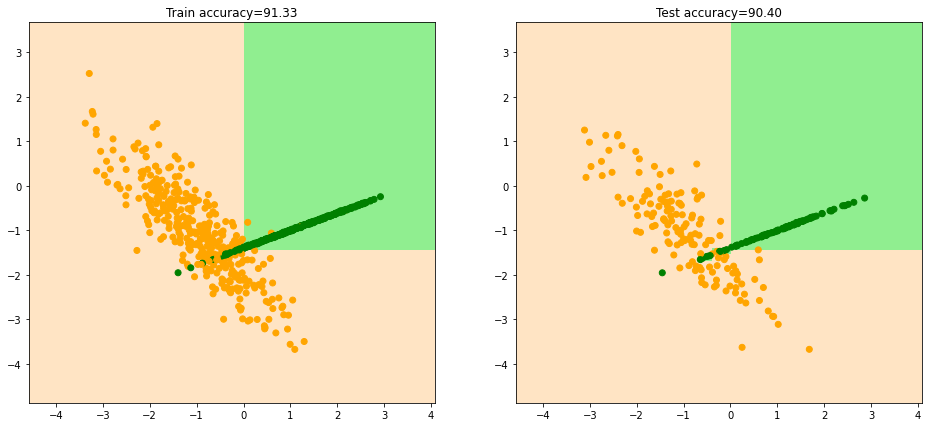

In [29]:
# сгенерированная выборка
plt.figure(figsize = (16, 7))

# график обучающей выборки
plt.subplot(1,2,1)
xx, yy = get_meshgrid(train_data)
mesh_predictions = np.array(predict(np.c_[xx.ravel(), yy.ravel()], tree_var)).reshape(xx.shape)
plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, cmap = colors)
plt.title(f'Train accuracy={accuracy_train:.2f}')

# график тестовой выборки
plt.subplot(1,2,2)
plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, cmap = colors)
plt.title(f'Test accuracy={accuracy_test:.2f}')